In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

## Importing the required libraries

In [23]:
file_path_down = 'Downwelling_Irradiance.tab'
file_path_reflected = 'Reflected_Irradiance.tab'
file_path_transmittance = 'Transmitted_Irradiance.tab'

df_down = pd.read_csv(file_path_down, sep='\t', skiprows=658)
df_reflected = pd.read_csv(file_path_reflected, sep='\t', skiprows=659)
df_transmittance = pd.read_csv(file_path_transmittance, sep='\t', skiprows=25)

## Loading the data sets
## Sparsing the data sets and removing the unnecessary rows

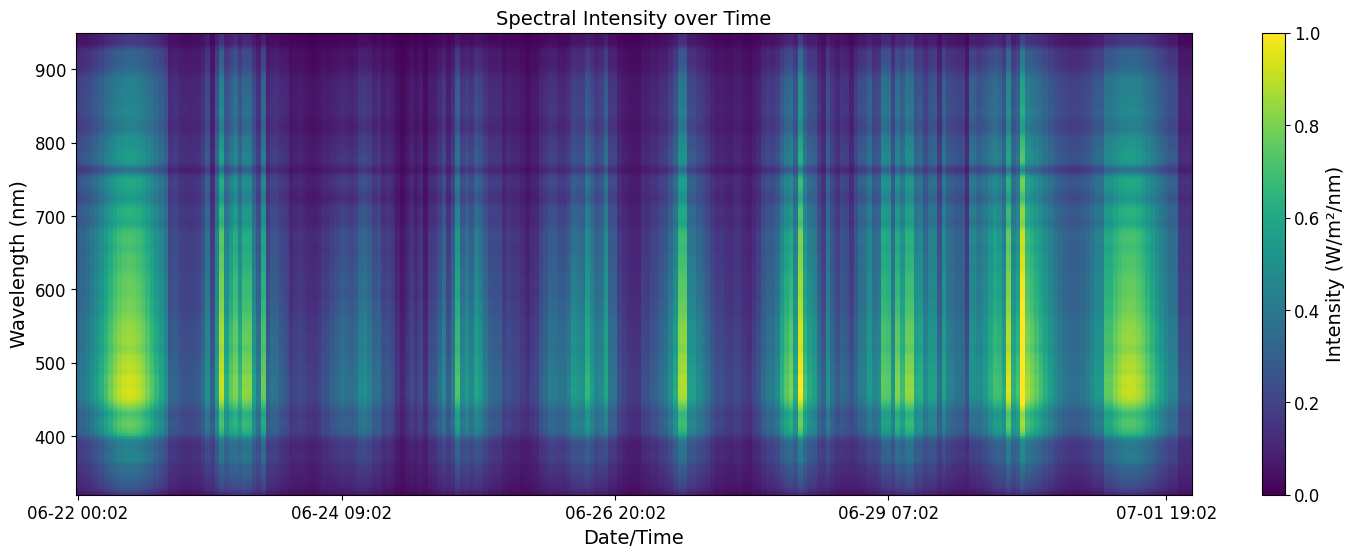

In [30]:
df_down['Date/Time'] = pd.to_datetime(df_down['Date/Time'])

start_time = "2020-06-21T23:59:59"
end_time = "2020-07-01T23:59:59"

df_down_filtered = df_down[(df_down["Date/Time"] >= start_time) & (df_down["Date/Time"] <= end_time)]

wavelengths = np.arange(320, 951)
Ei_columns = [f"Ei_{wl} [W/m**2/nm]" for wl in wavelengths]
df_plot = df_down_filtered[["Date/Time"] + Ei_columns].set_index("Date/Time")
data_array = df_plot.T.values

fig, ax = plt.subplots(figsize=(18, 6))
c = ax.pcolormesh(df_plot.index, wavelengths, data_array, shading='auto', cmap='viridis', vmin=0, vmax=1)
ax.set_xlabel("Date/Time", fontsize=14)
ax.set_ylabel("Wavelength (nm)", fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
ax.set_ylim(320, 950)
cbar = fig.colorbar(c)
cbar.set_label("Intensity (W/m²/nm)", fontsize=14)
cbar.ax.tick_params(labelsize=12)
ax.set_xticks(df_plot.index[::len(df_plot.index) // 4])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.title('Spectral Intensity over Time', fontsize=14)
#plt.savefig('Downwelling.png', dpi=200, bbox_inches="tight")

plt.show()

## This cell processes and visualizes spectral intensity data over time.
## It converts the Date/Time column to datetime format, filters the data for a specific time range, and prepares it for plotting.
## A pseudocolor plot is created to show intensity variations across wavelengths (320–950 nm) and time, with axes labeled and formatted.
## The plot is displayed with a color bar indicating intensity values.

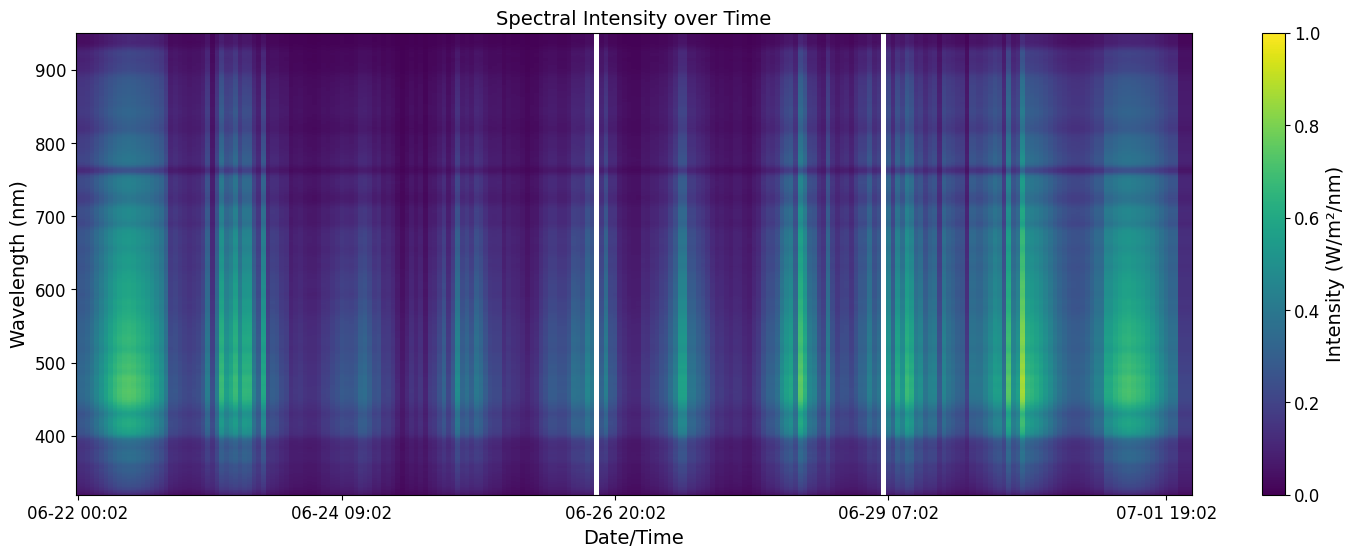

In [31]:
df_reflected['Date/Time'] = pd.to_datetime(df_reflected['Date/Time'])

start_time = "2020-06-21T23:59:59"
end_time = "2020-07-01T23:59:59"

df_reflected_filtered = df_reflected[(df_reflected["Date/Time"] >= start_time) & (df_reflected["Date/Time"] <= end_time)]

wavelengths = np.arange(320, 951)
Eu_ref_columns = [f"Eu_ref_{wl} [W/m**2/nm]" for wl in wavelengths]
df_plot = df_reflected_filtered[["Date/Time"] + Eu_ref_columns].set_index("Date/Time")
data_array = df_plot.T.values

fig, ax = plt.subplots(figsize=(18, 6))
c = ax.pcolormesh(df_plot.index, wavelengths, data_array, shading='auto', cmap='viridis', vmin=0, vmax=1)
ax.set_xlabel("Date/Time", fontsize=14)
ax.set_ylabel("Wavelength (nm)", fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
cbar = fig.colorbar(c)
cbar.set_label("Intensity (W/m²/nm)", fontsize=14)
cbar.ax.tick_params(labelsize=12)
ax.set_xticks(df_plot.index[::len(df_plot.index) // 4])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.title('Spectral Intensity over Time', fontsize=14)
#plt.savefig('Reflected.png', dpi=200, bbox_inches="tight")

plt.show()

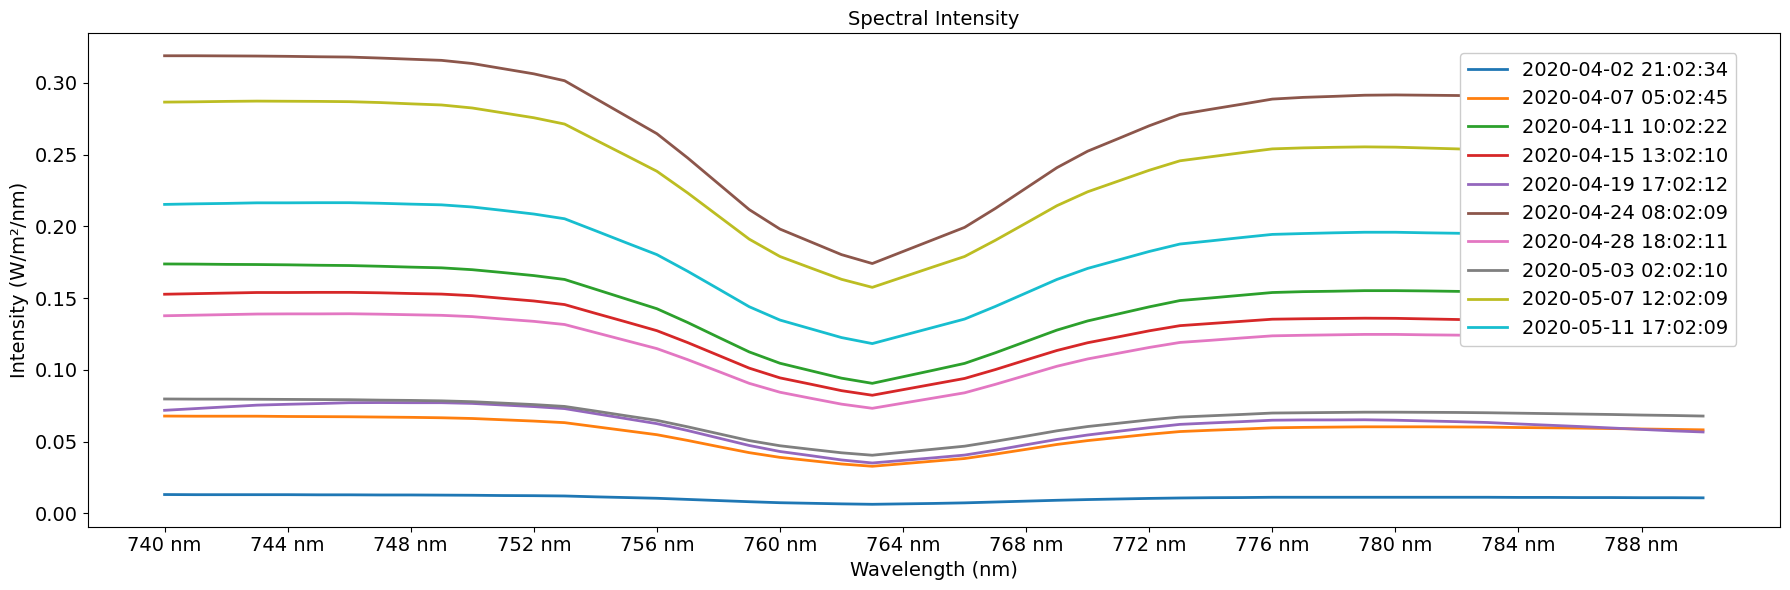

In [32]:
rows_to_plot = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] # random selection of measurements

wavelength_columns = df_down.loc[:, 'Ei_740 [W/m**2/nm]':'Ei_790 [W/m**2/nm]'].columns

plt.figure(figsize=(18, 6))
for row in rows_to_plot:
    row_data = df_down.loc[row, 'Ei_740 [W/m**2/nm]':'Ei_790 [W/m**2/nm]']
    datetime_label = df_down.loc[row, 'Date/Time'].strftime('%Y-%m-%d %H:%M:%S')  # Convert datetime to string
    plt.plot(wavelength_columns, row_data, linestyle='-', label=datetime_label, linewidth=2)  # Increased line width
x_ticks = [f'Ei_{wavelength} [W/m**2/nm]' for wavelength in range(740, 790, 4)]
x_labels = [f'{wavelength} nm' for wavelength in range(740, 790, 4)]
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Intensity (W/m²/nm)', fontsize=14)
plt.title('Spectral Intensity', fontsize=14)

plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.98), fontsize=14, framealpha=1)

plt.tight_layout()
plt.show()

## This cell plots 10 measurements of downwelling solar radiation captured at distinct datetime points. 
## The observed valleys in the plot, characterized by a decrease in irradiance, are attributed to the absorption features of the Oxygen A-band.
## The variations across the 10 measurements reflect differences in atmospheric oxygen concentration, path length, and illumination conditions at the respective times of observation.